<h1><center>DS 300 - Take-home Quiz 1</center></h1>

# Introduction
In this assignment, you are given some housing data from the real estate market of US. Your ultimate goal is to preprocess the data so that:

+ 1) missing data are permuted;
+ 2) irrelevant features are removed;
+ 3) duplicated features are dropped;
+ 4) numeric data are standardized;
+ 5) a linear regression model is fit to predict the housing price.

Simply follow along the instructions and answer the questions. 

## Question 1: Obtain the Data

#### Import all necessary libraries

In [144]:
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt
import seaborn as sns

#### Create an SQLite engine and read the `data` table from the given database into a variable named as `data`.
#### Data can be found at [link](https://github.com/BlueJayADAL/DS300/raw/master/datasets/real-estate.sqlite), and you should place it to the same directory as this notebook.

In [145]:
# Need to place the database file in the same directory of the notebook
engine = db.create_engine('sqlite:///real-estate.sqlite')

In [146]:
connection = engine.connect()

In [147]:
metadata = db.MetaData()

In [148]:
data = db.Table('data', metadata, autoload = True, autoload_with = engine)

## Question 2: Data Extraction
#### Use a query to read all data except `id` and `date` columns into an array, then use the array to create a DataFrame named `df`.

In [149]:
# Step1: construct a string with all needed columns, separated by commas
# Note: there is no comma after the last column

selected_cols_str = ', '.join(data.columns.keys()[2:])




In [150]:
# Display the string
selected_cols_str

'price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, sqft_all, rcprice, has_wine_bar, garage_type, has_sqft_living, sqft_living2, has_sqft_lot, sqft_lot2, has_sqft_above, sqft_above2, has_sqft_basement, sqft_basement2, has_sqft_living15, sqft_living152, has_sqft_lot15, sqft_lot152, has_sqft_all, sqft_all2'

In [151]:
selected_cols_str = "SELECT " + selected_cols_str + " FROM data"

In [152]:
selected_cols_str

'SELECT price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, sqft_all, rcprice, has_wine_bar, garage_type, has_sqft_living, sqft_living2, has_sqft_lot, sqft_lot2, has_sqft_above, sqft_above2, has_sqft_basement, sqft_basement2, has_sqft_living15, sqft_living152, has_sqft_lot15, sqft_lot152, has_sqft_all, sqft_all2 FROM data'

In [153]:
## Step2: Use the contructed string to form a SQL query
## Then query the data from the database

ResultProxy = connection.execute(selected_cols_str)

In [154]:
ResultSet = ResultProxy.fetchall()

In [155]:
# Step3: Generate a DataFrame df

df = pd.DataFrame(data=ResultSet, columns=ResultSet[0].keys())





In [156]:
# Show the first 5 rows of the DataFrame
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,has_sqft_above,sqft_above2,has_sqft_basement,sqft_basement2,has_sqft_living15,sqft_living152,has_sqft_lot15,sqft_lot152,has_sqft_all,sqft_all2
0,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3,7,...,1,34.351128,0,0.000000,1,36.606010,1,75.166482,1,122.474487
1,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3,7,...,1,46.583259,1,20.000000,1,41.109610,1,87.401373,1,147.346530
2,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3,6,...,1,27.748874,0,0.000000,1,52.153619,1,89.788641,1,149.405489
3,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,5,7,...,1,32.403703,1,30.166206,1,36.878178,1,70.710678,1,123.612297
4,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,3,8,...,1,40.987803,0,0.000000,1,42.426407,1,86.619859,1,144.024304


## Question 3: EDA

#### Show a histogram of the `price` column.

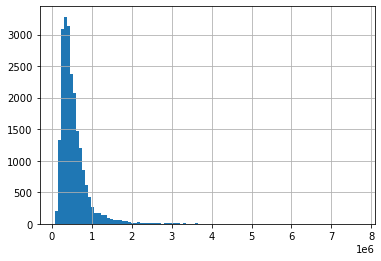

In [157]:
plt.hist(df['price'], bins = 100)
plt.grid(True)

#### Show the total number of missing values in each column.

In [158]:
df.isna().sum()

price                 0
bedrooms             11
bathrooms             0
sqft_living          24
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
sqft_all              0
rcprice               0
has_wine_bar          0
garage_type           0
has_sqft_living       0
sqft_living2          0
has_sqft_lot          0
sqft_lot2             0
has_sqft_above        0
sqft_above2           0
has_sqft_basement     0
sqft_basement2        0
has_sqft_living15     0
sqft_living152        0
has_sqft_lot15        0
sqft_lot152           0
has_sqft_all          0
sqft_all2             0
dtype: int64

#### Show the total number of occurences of each category in the column `bedrooms`. 

In [159]:
df['bedrooms'].value_counts()

3.0     9821
4.0     6877
2.0     2760
5.0     1598
6.0      272
1.0      199
7.0       38
0.0       13
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

## Question 4: Data Imputation

#### Impute the missing values of feature `bedrooms` with a constant. And the constant must be the category that has the most occurrences. 

*Note: To receive full credits, you must use the SimpleImputer from sklearn. In addition, the most occurrences has to be calculated rather than hard-coded.*

In [160]:
# Import the SimpleImputer

from sklearn.impute import SimpleImputer


In [161]:
# Find the mode, and use it to fix the NANs.
bedMode = df['bedrooms'].value_counts().idxmax()

imp = SimpleImputer(missing_values=np.nan, 
                    strategy='constant', 
                    fill_value= bedMode)
newBeds = imp.fit_transform(df['bedrooms'].values.reshape(-1,1))
df['bedrooms'] = newBeds

In [162]:
# Double check if our imputation works
df['bedrooms'].isnull().sum()

0

## Question 5: Data Imputation the 2nd Pass
#### One way to impute the missing values of column 'sqft_living' is to fill in the mean square footage of all the data entries (imputation). However we can be smarter about this and check the average sqft by the number of bedrooms of the data entry. 
#### Let's first use boxplot from Seanborn to visualize whether it makes sense to do so.

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>

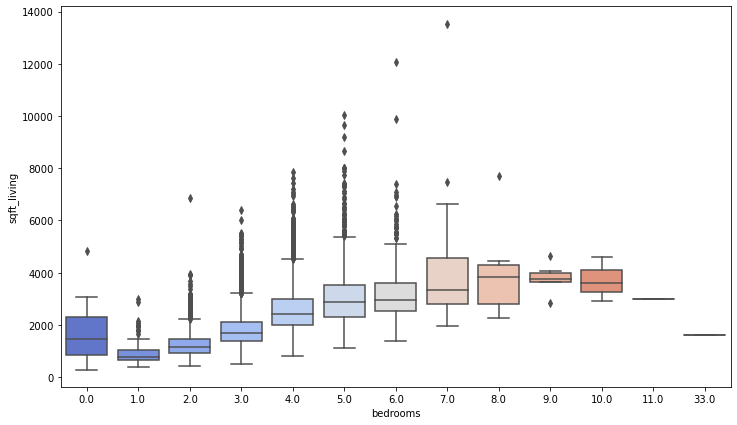

In [163]:
plt.figure(figsize=(12, 7))
sns.boxplot(data = df, x = 'bedrooms', y = 'sqft_living', palette='coolwarm')

#### To impute the missing values in column 'sqft_living', let's first use the following strategy to create a function named "impute_sqft":

```
If # of bedrooms == 1: sqft = 1200
If # of bedrooms == 2: sqft = 1500
If # of bedrooms == 3: sqft = 1800
If # of bedrooms == 4: sqft = 2100
If # of bedrooms == 5: sqft = 2500
If # of bedrooms == everything else: sqft = 3000
```

#### Function 'impute_sqft':
```
Input: a single argument with DataFrame type. When calling this function, we will pass in a DataFrame of the `bedrooms` and `sqft_living` columns
Output: return the permuted value if the entry is missing; or return the original value if the entry is present. 
```


In [164]:
def impute_sqft(cols):
    beds = cols[0]
    sqft = cols[1]
    
    if pd.isnull(sqft):
        if beds == 1:
            return 1200
        elif beds == 2:
            return 1500
        elif beds == 3:
            return 1800
        elif beds == 4:
            return 2100
        elif beds == 5:
            return 2500
        else:
            return 3000
    else:
        return sqft





#### Now apply the `impute_sqrt()` function to fill the missing values on column `sqft_living`

In [165]:
df['sqft_living'] = df[['bedrooms', 'sqft_living']].apply(impute_sqft, axis=1)



In [166]:
## Double check if our imputation works
df['sqft_living'].isnull().sum()

0

## Question 6: Feature Selection

#### Use pairplot from Seaborn to visualize columns ['has_sqft_living', 'has_sqft_lot', 'has_sqft_above', 'has_sqft_living15', 'has_sqft_lot15', 'has_sqft_all'] from the DataFrame. 

#### What do you find? Write down your findings and delete all these columns from DataFrame.

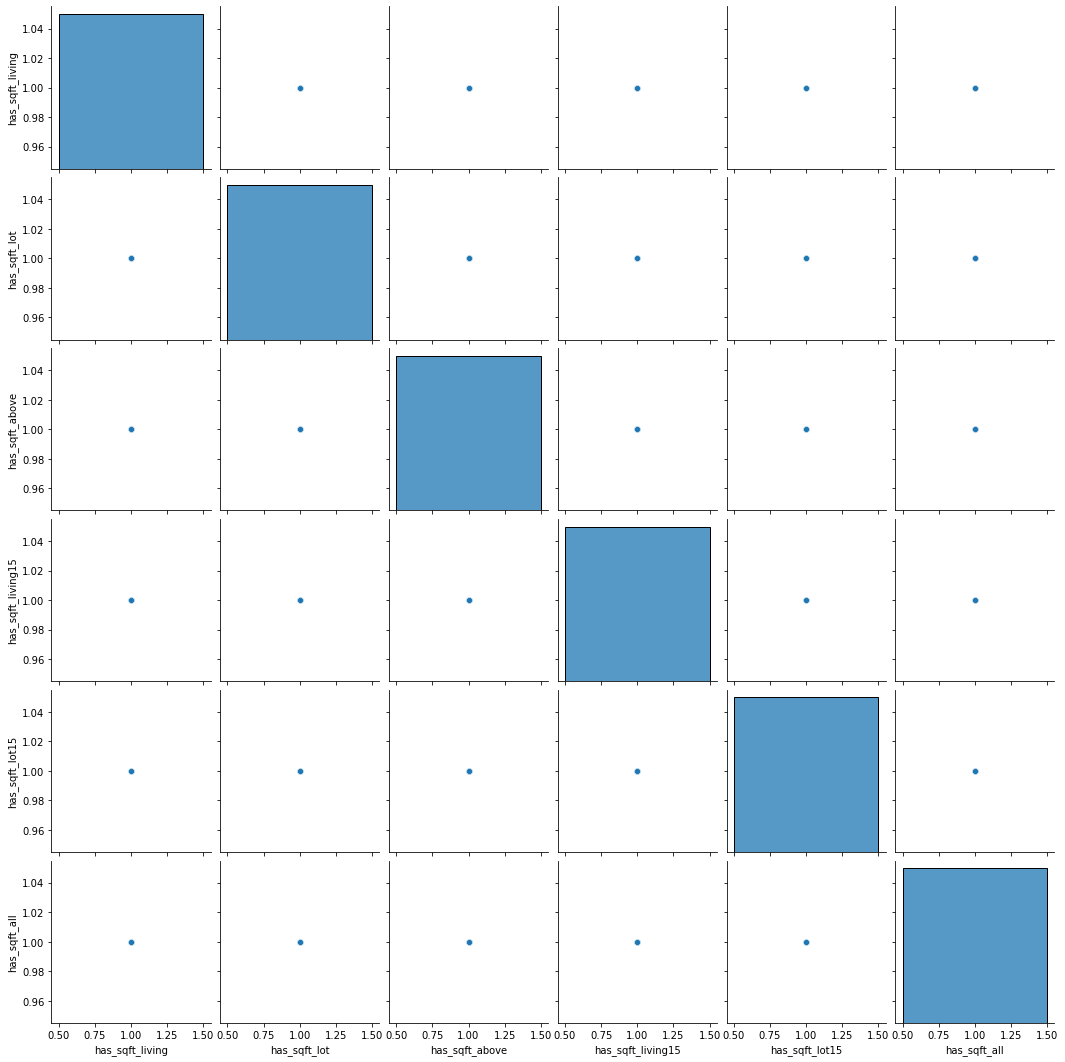

In [167]:
sns.pairplot(df[['has_sqft_living', 'has_sqft_lot', 'has_sqft_above', 'has_sqft_living15', 'has_sqft_lot15', 'has_sqft_all']])




#### Write down your findings down below, and answer why do we need to drop them?

In [168]:
# Answer: 
#These features have no spread and all the data is at 1, 
#meaning they are highly related
#so there will be no benifit to including these features, 
#they will only hurt the model

# These features are all constant



#### Drop all the aforementioned columns from the DataFrame

In [169]:
df.drop(['has_sqft_living', 'has_sqft_lot', 'has_sqft_above', 'has_sqft_living15', 'has_sqft_lot15', 'has_sqft_all'], axis = 1, inplace=True)




In [170]:
## Double check if the columns are gone
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_all', 'rcprice', 'has_wine_bar',
       'garage_type', 'sqft_living2', 'sqft_lot2', 'sqft_above2',
       'has_sqft_basement', 'sqft_basement2', 'sqft_living152', 'sqft_lot152',
       'sqft_all2'],
      dtype='object')

## Question 7: Feature Selection the 2nd Pass

#### Have you noticed there are many highly correlated columns that can be identified by their names? It's safe to just keep one from each group!

```
Group 1: ['sqft_living', 'sqft_living15', 'sqft_living2', 'sqft_living152']
Group 2: ['sqft_lot', 'sqft_lot15', 'sqft_lot2', 'sqft_lot152']
Group 3: ['sqft_above', 'sqft_above2']
Group 4: ['sqft_basement', 'sqft_basement2']
Group 5: ['sqft_all', 'sqft_all2']
```

#### Let's first check out the correlation table for each group

In [171]:
df[['sqft_living', 'sqft_living15', 'sqft_living2', 'sqft_living152']].corr()

,sqft_living,sqft_living15,sqft_living2,sqft_living152
sqft_living,1.000000,0.756074,0.987358,0.748243
sqft_living15,0.756074,1.000000,0.756974,0.994109
sqft_living2,0.987358,0.756974,1.000000,0.757893
sqft_living152,0.748243,0.994109,0.757893,1.000000


In [172]:
df[['sqft_lot', 'sqft_lot15', 'sqft_lot2', 'sqft_lot152']].corr()

,sqft_lot,sqft_lot15,sqft_lot2,sqft_lot152
sqft_lot,1.000000,0.718557,0.899933,0.696331
sqft_lot15,0.718557,1.000000,0.770809,0.925140
sqft_lot2,0.899933,0.770809,1.000000,0.859910
sqft_lot152,0.696331,0.925140,0.859910,1.000000


In [173]:
df[['sqft_above', 'sqft_above2']].corr()



,sqft_above,sqft_above2
sqft_above,1.000000,0.990104
sqft_above2,0.990104,1.000000


In [174]:
df[['sqft_basement', 'sqft_basement2']].corr()



,sqft_basement,sqft_basement2
sqft_basement,1.000000,0.962298
sqft_basement2,0.962298,1.000000


In [175]:
df[['sqft_all', 'sqft_all2']].corr()

,sqft_all,sqft_all2
sqft_all,1.000000,0.930968
sqft_all2,0.930968,1.000000


#### Now just keep the first feature from each group and remove everything else.

In [176]:
df.drop(['sqft_living15', 'sqft_living2', 'sqft_living152', 'sqft_lot15', 'sqft_lot2', 'sqft_lot152', 'sqft_above2', 'sqft_basement2', 'sqft_all2'], axis = 1, inplace=True)


In [177]:
# Check the columns after feature selection
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_all', 'rcprice', 'has_wine_bar', 'garage_type',
       'has_sqft_basement'],
      dtype='object')

## Question 8: Split the Data

#### Use all columns except the `price` column to create a feature matrix X, and use the `price` column to create the y vector.
#### Then split X, y with 80% for training set, and use random seed as 101.

In [178]:
X = df.drop('price', axis = 1)


y = df['price']



In [179]:
from sklearn.model_selection import train_test_split

In [180]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [181]:
print('X_train dimension: ', X_train.shape)
print('X_test dimension: ', X_test.shape)

X_train dimension:  (17290, 21)
X_test dimension:  (4323, 21)


## Question 9: Data Transformation

#### Standardize all features for both training and testing sets so that they have zero mean and unit variance.

In [182]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [183]:
X_train = sc.fit_transform(X_train.values)

In [184]:
X_test = sc.transform(X_test.values)

#### Then fit the training set to a Linear Regressor and find the $R^2$ score of the predicted results.

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
lm = LinearRegression()

In [187]:
lm.fit(X_train, y_train)

LinearRegression()

In [188]:
pred = lm.predict(X_test)

In [189]:
from sklearn.metrics import r2_score

In [190]:
print('R2:',r2_score(y_test, pred))





R2: 0.7088156883158795


## Question 10: Feature Regularization


### Regularized Linear Models

We have learned that polynomial regression fits a n-th order polynomial to our data using least squares. There’s a question that we didn’t answer: which order of the polynomial should we choose? Clearly, the higher the order of the polynomial, the higher the complexity of the model. However, having too high of the order will lead to an over-fitted model. In practice, we use the regularization technique to apply a penalty on the coefficients to prevent overfitting. 

There are two well-known approaches: 

+ Ridge regression
+ Lasso regression

Ridge regression puts an L2 norm penalty on the regression coefficients. Another popular regularization technique is the LASSO, a technique which puts an L1 norm penalty instead. The difference between the two is that the LASSO leads to sparse solutions, driving most coefficients to zero, whereas Ridge Regression leads to dense solutions, in which most coefficients are non-zero. Due to its tendency to prefer solutions with fewer non-zero coefficients in Lasso regression, it can effectively reduce the number of features upon which the given solution is dependent.


### Sklearn Implementation

In Sklearn, one can refer to this [page](https://scikit-learn.org/stable/modules/linear_model.html) for the concrete examples of ridge and lasso regressions. 

Among all the hyper-parameters, the alpha parameter is the utmost important. It is the complexity parameter that controls the amount of shrinkage: the larger the value of alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

The alpha parameter needs to be tuned on each dataset. The default parameter will not lead to the optimal model. Therefore, we need to tune the alpha parameter with cross-validation.

`RidgeCV()` and `LassoCV()` are the cross-validation versions of the ridge and lasso implementation. 

#### Use the `alpha` given below, fit the dataset to a `RidgeCV()` model

In [191]:
# import libraries and create alphas.

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

#### Use 10-fold cross validation to train `RidgeCV()`.

In [192]:
clf = RidgeCV(alphas=alphas)

clf.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-1...
       1.18953407e-03, 1.30490198e-03, 1.43145894e-03, 1.57029012e-03,
       1.72258597e-03, 1.88965234e-03, 2.07292178e-03, 2.27396575e-03,
       2.49450814e-03, 2.73644000e-03, 3.00183581e-03, 3.29297126e-03,
       3.61234270e-03, 3.96268864e-03, 4.34701316e-03, 4.76861170e-03,
       5.23109931e-03, 5.73844165e-03, 6.29498899e-03, 6.90551352e-03,
       7.57525026e-03, 8.30994195e-03, 9.11588830e-03, 1.00000000e-02]))

#### Obtain the optimal `alpha` from the trained `RidgeCV` object. Then re-train a `Ridge()` model with the optimal alpha. Show the final $R^2$ score.

In [193]:
clf.alpha_

0.01

In [194]:
rdg = Ridge(alpha=clf.alpha_)
rdg.fit(X_train, y_train)

Ridge(alpha=0.01)

In [195]:
rdgPred = rdg.predict(X_test)

In [196]:
print('R2:',r2_score(y_test, rdgPred))




R2: 0.7088156380173919


# Great Job!